# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 9006668
sectors = np.array([2,29])

period = 1.2731140178
tdepth = 0.000391117

lc_file = "TOI_238_S02_29.csv"
contrastcurve_file = "TOI_238_832nm.csv"

band = 'TESS'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

Sector 2


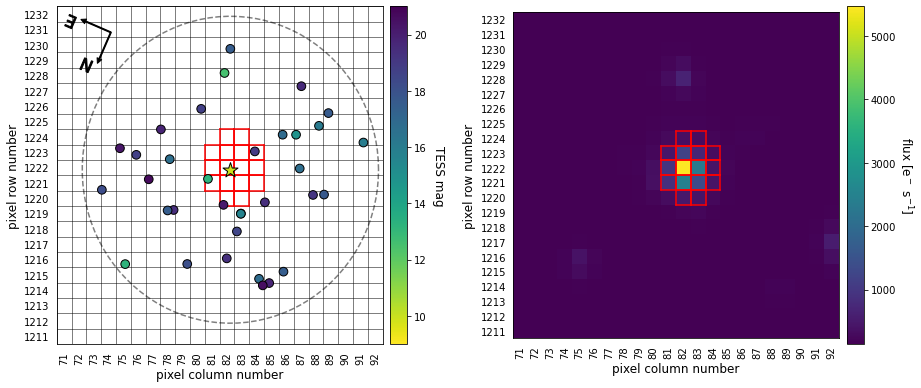

Sector 29


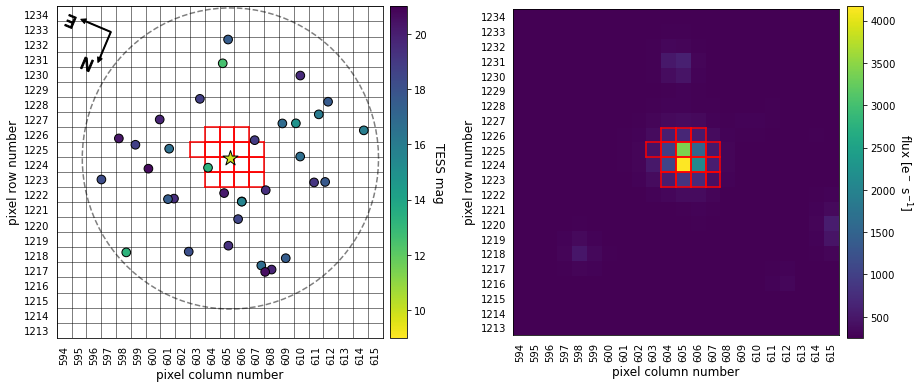

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,9006668,9.9266,9.214,8.767,8.598,349.231323,-18.606645,0.840000,0.766028,5029.0,12.387300,0.000,0.000
1,9006666,13.2577,12.730,12.458,12.418,349.238419,-18.599924,1.240000,2.107990,6316.0,0.631795,34.228,45.014
2,2052212922,18.9153,NaN,NaN,NaN,349.224907,-18.616881,NaN,NaN,3990.0,0.930813,42.860,210.714
3,2052212927,20.1175,NaN,NaN,NaN,349.228355,-18.593374,NaN,NaN,4520.0,-0.164167,48.839,348.033
4,9006665,18.2407,15.537,14.764,14.601,349.220323,-18.593123,NaN,NaN,NaN,NaN,61.471,322.366
5,10000007152,15.6140,14.697,13.905,14.020,349.220306,-18.593031,NaN,NaN,NaN,NaN,61.768,322.511
6,2052212926,19.3847,NaN,NaN,NaN,349.212952,-18.600805,NaN,NaN,NaN,NaN,66.114,288.541
7,9006663,18.4905,15.946,15.226,14.786,349.219003,-18.586273,NaN,NaN,NaN,NaN,84.534,330.176
8,9006667,16.6529,16.110,15.722,15.774,349.256152,-18.600697,NaN,NaN,6545.0,0.452907,87.379,75.818
9,9006671,16.8681,16.161,15.568,15.495,349.216949,-18.627081,0.900000,0.500201,5263.0,0.666537,88.414,213.685


In [4]:
ap02 = np.array([[82,1220],[83,1220],[81,1221],[82,1221],[83,1221],[84,1221],
                 [81,1222],[82,1222],[83,1222],[84,1222],[81,1223],[82,1223],
                 [83,1223],[84,1223],[82,1224],[83,1224]])

ap29 = np.array([[604,1223],[605,1223],[606,1223],[607,1223],[604,1224],
                 [605,1224],[606,1224],[607,1224],[603,1225],[604,1225],
                 [605,1225],[606,1225],[607,1225],[604,1226],[605,1226],
                 [606,1226]])


apertures = np.array([ap02, ap29])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [5]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,9006668,9.9266,9.214,8.767,8.598,349.231323,-18.606645,0.840000,0.766028,5029.0,12.387300,0.000,0.000,9.718094e-01,0.000402
1,9006666,13.2577,12.730,12.458,12.418,349.238419,-18.599924,1.240000,2.107990,6316.0,0.631795,34.228,45.014,2.713824e-02,0.014412
2,2052212922,18.9153,NaN,NaN,NaN,349.224907,-18.616881,NaN,NaN,3990.0,0.930813,42.860,210.714,1.443391e-04,0.000000
3,2052212927,20.1175,NaN,NaN,NaN,349.228355,-18.593374,NaN,NaN,4520.0,-0.164167,48.839,348.033,2.730506e-05,0.000000
4,9006665,18.2407,15.537,14.764,14.601,349.220323,-18.593123,NaN,NaN,NaN,NaN,61.471,322.366,6.912837e-05,0.000000
5,10000007152,15.6140,14.697,13.905,14.020,349.220306,-18.593031,NaN,NaN,NaN,NaN,61.768,322.511,7.545059e-04,0.518375
6,2052212926,19.3847,NaN,NaN,NaN,349.212952,-18.600805,NaN,NaN,NaN,NaN,66.114,288.541,2.312236e-05,0.000000
7,9006663,18.4905,15.946,15.226,14.786,349.219003,-18.586273,NaN,NaN,NaN,NaN,84.534,330.176,2.426859e-06,0.000000
8,9006667,16.6529,16.110,15.722,15.774,349.256152,-18.600697,NaN,NaN,6545.0,0.452907,87.379,75.818,1.608797e-05,0.000000
9,9006671,16.8681,16.161,15.568,15.495,349.216949,-18.627081,0.900000,0.500201,5263.0,0.666537,88.414,213.685,1.085708e-05,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

1 9006666
5 10000007152


In [7]:
target.stars['tdepth'][1] = 0
target.stars['tdepth'][5] = 0

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_20236\3008957750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][1] = 0
C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_20236\3008957750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][5] = 0


# Ploting CC File

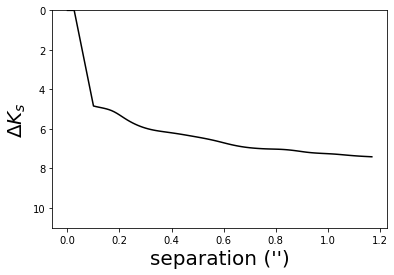

In [8]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(11,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

CPU times: total: 5.98 s
Wall time: 6 s


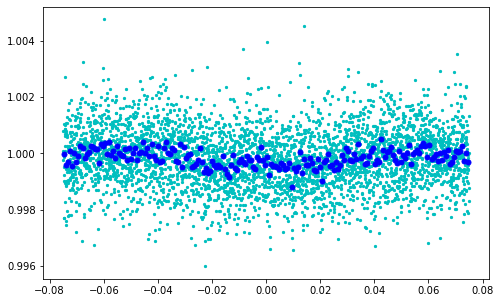

In [9]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [10]:
FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 9006668.
Calculating EB and EBx2P scenario probabilities for 9006668.
Calculating PTP scenario probability for 9006668.
Calculating PEB and PEBx2P scenario probabilities for 9006668.
Calculating STP scenario probability for 9006668.
Calculating SEB and SEBx2P scenario probabilities for 9006668.
Calculating DTP scenario probability for 9006668.
Calculating DEB and DEBx2P scenario probabilities for 9006668.
Calculating BTP scenario probability for 9006668.
Calculating BEB and BEBx2P scenario probabilities for 9006668.
FPP =  0.002238713585628771
NFPP =  0.0
Calculating TP scenario probabilitiey for 9006668.
Calculating EB and EBx2P scenario probabilities for 9006668.
Calculating PTP scenario probability for 9006668.
Calculating PEB and PEBx2P scenario probabilities for 9006668.
Calculating STP scenario probability for 9006668.
Calculating SEB and SEBx2P scenario probabilities for 9006668.
Calculating DTP scenario probability for 9006668.
Calculat

In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.002064492088341252
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,9006668,TP,0.840000,0.766028,1.273114,84.446198,0.608544,0.146437,200.979004,1.715467,0.000000,0.000000,9.319254e-01
1,9006668,EB,0.840000,0.766028,1.273114,55.139250,1.441381,0.665908,77.954694,0.000000,0.718359,0.749673,9.729650e-44
2,9006668,EBx2P,0.840000,0.766028,2.546228,84.180167,0.797183,0.610939,183.178227,0.000000,0.815735,0.766028,7.084885e-27
3,9006668,PTP,0.840000,0.766028,1.273114,84.945968,0.516409,0.046241,127.922403,2.334245,0.000000,0.000000,2.975980e-02
4,9006668,PEB,0.840000,0.766028,1.273114,50.531780,1.589827,0.674053,68.009381,0.000000,0.697805,0.728450,2.109324e-45
5,9006668,PEBx2P,0.840000,0.766028,2.546228,83.892442,0.641395,0.641546,163.355762,0.000000,0.819457,0.766028,3.383442e-30
6,9006668,STP,0.595826,0.594272,1.273114,88.901763,0.129944,0.031439,92.550585,3.524416,0.000000,0.000000,1.219192e-03
7,9006668,SEB,0.139332,0.169929,1.273114,87.957809,0.297879,0.725806,188.878695,0.000000,0.017445,0.100000,7.035765e-08
8,9006668,SEBx2P,0.127308,0.155939,2.546228,88.481658,0.442648,0.614698,162.875574,0.000000,0.122963,0.150632,2.966490e-10
9,9006668,DTP,0.840000,0.766028,1.273114,84.829757,0.557429,0.043089,203.960641,1.684041,0.000000,0.000000,3.625029e-02


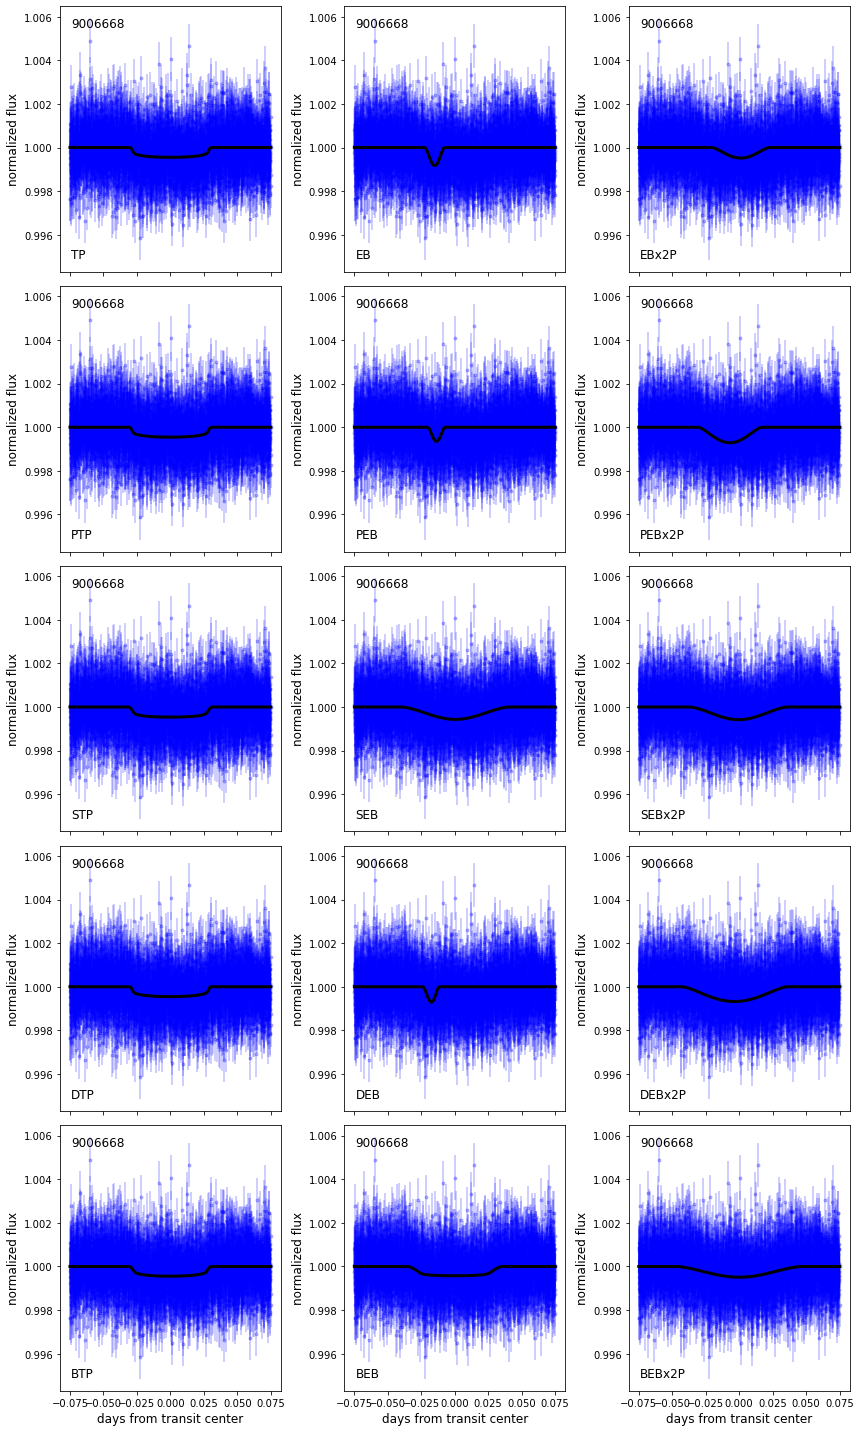

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [13]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

0.002238713585628771 ,
0.0022448972498554376 ,
0.002158518120188857 ,
0.001989614553846053 ,
0.0022283859501220915 ,
0.0018953041284703875 ,
0.002027437415778266 ,
0.0020227748992054373 ,
0.0021701285119389846 ,
0.002079354623626406 ,
0.0019128793274738598 ,
0.0021237526059567635 ,
0.0018934642861924145 ,
0.002084109659083677 ,
0.002093723373313261 ,
0.0021750547791223873 ,
0.0021392422172724634 ,
0.0019062414528815408 ,
0.0021803967500001464 ,
0.002064492088341252 ,
NFPPs:
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,


In [14]:
# BrGamma

FPP = np.array([0.0023641345170852812,0.002638557760342497,0.0022159054907628928,0.0023771973078672293,0.002803631242939919 ,
0.0025720321271115454 ,
0.0026250735532356018 ,
0.002444749837499427 ,
0.002609122288767418 ,
0.002269977661309097 ,
0.0023666459998505918 ,
0.0026565854415518952 ,
0.002668064886336863 ,
0.0024624341286293427 ,
0.002601582010550496 ,
0.0021019768743431033 ,
0.0023445467058275105 ,
0.002448112172814154 ,
0.0024499369994325226 ,
0.002631448975439099])

print("Mean FPP = ",np.round(np.mean(FPP),5))
print("Standard Deviation FPP = ",np.round(np.std(FPP),8))

Mean FPP =  0.00248
Standard Deviation FPP =  0.00017257


In [15]:
# 562nm (24/08/2020)

FPP = np.array([0.002803631242939919 ,
0.0025720321271115454 ,
0.0026250735532356018 ,
0.002444749837499427 ,
0.002609122288767418 ,
0.002269977661309097 ,
0.0023666459998505918 ,
0.0026565854415518952 ,
0.002668064886336863 ,
0.0024624341286293427 ,
0.002601582010550496 ,
0.0021019768743431033 ,
0.0023445467058275105 ,
0.002448112172814154 ,
0.0024499369994325226 ,
0.002631448975439099])

print("Mean FPP = ",np.round(np.mean(FPP),5))
print("Standard Deviation FPP = ",np.round(np.std(FPP),8))

Mean FPP =  0.0025
Standard Deviation FPP =  0.00017103


In [17]:
# 832nm (24/08/2020)

FPP = np.array([0.002238713585628771 ,
0.0022448972498554376 ,
0.002158518120188857 ,
0.001989614553846053 ,
0.0022283859501220915 ,
0.0018953041284703875 ,
0.002027437415778266 ,
0.0020227748992054373 ,
0.0021701285119389846 ,
0.002079354623626406 ,
0.0019128793274738598 ,
0.0021237526059567635 ,
0.0018934642861924145 ,
0.002084109659083677 ,
0.002093723373313261 ,
0.0021750547791223873 ,
0.0021392422172724634 ,
0.0019062414528815408 ,
0.0021803967500001464 ,
0.002064492088341252])

print("Mean FPP = ",np.round(np.mean(FPP),5))
print("Standard Deviation FPP = ",np.round(np.std(FPP),7))

Mean FPP =  0.00208
Standard Deviation FPP =  0.0001129
